<a href="https://colab.research.google.com/github/mekaviraj/ml_assignment_1/blob/main/ml_assignment_1_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Regression

For this exercise, you will experiment with regression, regularization, and cross-validation. Choose appropriate Dataset.

**Dataset choosen: Heart Disease Dataset**

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

**(a) Load the data into memory. Make an appropriate X matrix and y vector.**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

In [ ]:
[col for col in df.columns if df[col].isnull().sum()>0] #check if there is null data

[]

In [ ]:
df=df.drop_duplicates()

In [ ]:
X = df.drop("target", axis=1) # all columns except 'target'
y = df["target"] # target column

**(b) Split the data at random into one set (Xtrain, ytrain) containing 80% of the instances, which will
be used for training + validation, and a testing set Xtest, ytest) (containing remaining instances).**

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (241, 13)
Shape of X_test: (61, 13)
Shape of y_train: (241,)
Shape of y_test: (61,)


**(c) Give the objective of logistic regression with L2 regularization.**

Ridge regression, also known as L2 regularization, is a technique used in linear regression to prevent overfitting by adding a penalty term to the loss function. This penalty is proportional to the square of the magnitude of the coefficients (weights).

Ridge Regression is a version of linear regression that includes a penalty to prevent the model from overfitting, especially when there are many predictors or not enough data.

The standard loss function (mean squared error) is modified to include a regularization term:


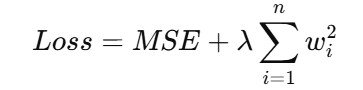

Here,
𝜆
λ is the regularization parameter that controls the strength of the penalty, and wi are the coefficients.

- Encouraging the model's coefficients to be small but not exactly zero.
- It helps to prevent any one feature from having an overly dominant   effect on the predictions.
- The larger the ' λ ' value, the stronger the regularization, and the smaller the coefficients will become

**(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data
and the testing data (averaged over all instances), as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third
graph the actual values of the weights obtained (one curve per weight). Finally, plot on a
graph the accuracy on the training and test set. Explain briefly what you see.**

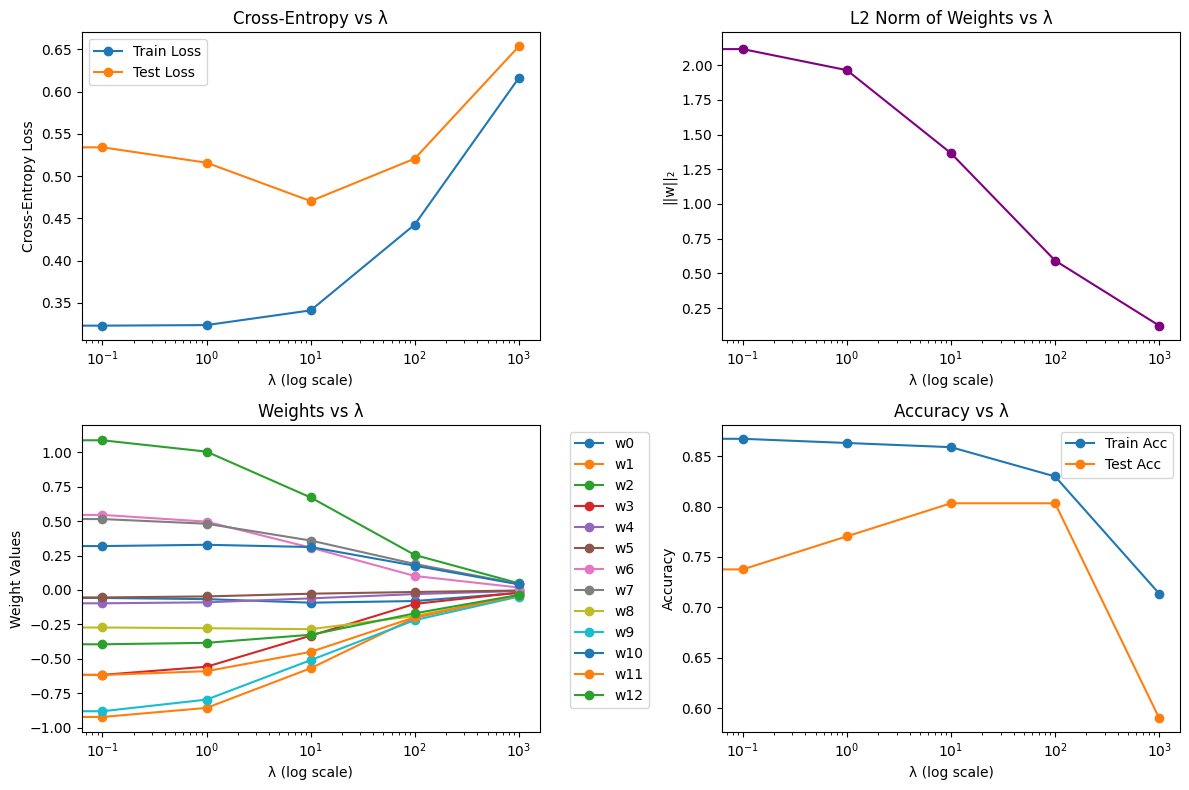


Summary of Results:
λ=0      | Train Loss=0.323, Test Loss=0.537, Train Acc=0.867, Test Acc=0.738, L2 Norm=2.135
λ=0.1    | Train Loss=0.323, Test Loss=0.534, Train Acc=0.867, Test Acc=0.738, L2 Norm=2.115
λ=1      | Train Loss=0.324, Test Loss=0.516, Train Acc=0.863, Test Acc=0.770, L2 Norm=1.963
λ=10     | Train Loss=0.341, Test Loss=0.471, Train Acc=0.859, Test Acc=0.803, L2 Norm=1.366
λ=100    | Train Loss=0.443, Test Loss=0.521, Train Acc=0.830, Test Acc=0.803, L2 Norm=0.593
λ=1000   | Train Loss=0.616, Test Loss=0.654, Train Acc=0.714, Test Acc=0.590, L2 Norm=0.124


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Standardize features (very important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define λ values to test
lambdas = [0, 0.1, 1, 10, 100, 1000]

# Empty lists to store results
train_loss, test_loss = [], []
l2_norms, weights = [], []
train_acc, test_acc = [], []

# Loop through each regularization parameter
for lam in lambdas:
    # If λ = 0 → no regularization
    if lam == 0:
        model = LogisticRegression(
            penalty=None, solver="lbfgs", max_iter=500
        )
    else:
        # Use L2 regularization, with C = 1/λ
        model = LogisticRegression(
            penalty="l2",
            C=1/lam,
            solver="lbfgs",
            max_iter=500
        )

    # Train the model
    model.fit(X_train, y_train)

    # Predict probabilities for log loss (cross-entropy)
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    # Cross-entropy loss
    train_loss.append(log_loss(y_train, y_train_prob))
    test_loss.append(log_loss(y_test, y_test_prob))

    # L2 norm of weight vector (measure of shrinkage)
    l2_norms.append(np.linalg.norm(model.coef_))

    # Save the weights (for later plotting)
    weights.append(model.coef_[0])

    # Accuracy on train/test sets
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

# Convert weights to array for easier plotting
weights = np.array(weights)

# Creating plots
plt.figure(figsize=(12, 8))

# 1. Cross-entropy loss
plt.subplot(2, 2, 1)
plt.plot(lambdas, train_loss, marker='o', label="Train Loss")
plt.plot(lambdas, test_loss, marker='o', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ")
plt.legend()

# 2. L2 norm of weights
plt.subplot(2, 2, 2)
plt.plot(lambdas, l2_norms, marker='o', color="purple")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w||₂")
plt.title("L2 Norm of Weights vs λ")

# 3. Weight values
plt.subplot(2, 2, 3)
for i in range(weights.shape[1]):
    plt.plot(lambdas, weights[:, i], marker='o', label=f"w{i}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight Values")
plt.title("Weights vs λ")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# 4. Accuracy
plt.subplot(2, 2, 4)
plt.plot(lambdas, train_acc, marker='o', label="Train Acc")
plt.plot(lambdas, test_acc, marker='o', label="Test Acc")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()

plt.tight_layout()
plt.show()

# summary of observations
print("\nSummary of Results:")
for i, lam in enumerate(lambdas):
    print(f"λ={lam:<6} | Train Loss={train_loss[i]:.3f}, "
          f"Test Loss={test_loss[i]:.3f}, "
          f"Train Acc={train_acc[i]:.3f}, Test Acc={test_acc[i]:.3f}, "
          f"L2 Norm={l2_norms[i]:.3f}")


**Observations:**

**Cross-Entropy vs λ**
For λ = 0 and 0.1, training loss is very low (approx0.32), while test loss is higher (~0.53), indicates some overfitting (model fits training well but doesn’t generalize perfectly).

At λ = 1 and 10, test loss decreases slightly (~0.47–0.48), showing better generalization.

For large λ (100, 1000), both train and test loss increase sharply, model is underfitting due to excessive regularization.

**L2 Norm of Weights vs λ**

As λ increases, the L2 norm shrinks from ~2.1 (λ=0) to ~0.12 (λ=1000).

This confirms that stronger regularization drives weights toward zero, reducing model complexity.

**Weights vs λ**

At small λ (0, 0.1, 1), many weights have larger magnitudes (both positive and negative) → model is flexible.

As λ grows, all weights shrink smoothly toward 0.

At λ=1000, almost all weights are near zero → model essentially ignores most features.

**Accuracy vs λ**

Training accuracy stays high (~0.86) for small λ, but test accuracy improves slightly from ~0.74 (λ=0) to ~0.80 (λ=10).

Best generalization performance appears around λ = 10.

For large λ (100, 1000), both train and test accuracy drop sharply (down to ~0.71 train, ~0.59 test) → clear underfitting.

**Overall Conclusion:**

With very small λ, the model overfits (low train loss, higher test loss).

With moderate λ (1–10), test loss is lowest and accuracy is highest → best balance between bias and variance.

With very large λ (100–1000), model underfits → weights shrink too much, reducing predictive power.

**(e) Re-format the data in the following way: take each of the input variables, and feed it through
a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),
use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.
You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.**

In [ ]:
import numpy as np
import pandas as pd

X = df.drop("target", axis=1).values
y = df["target"].values

# Define Gaussian basis function
def gaussian_basis(x, mu, sigma):

    return np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))

# Define transformation function
def gaussian_basis_transform(X, sigma, num_basis=5, low=-10, high=10):

    n_samples, n_features = X.shape
    # Means mu equally spaced between [low, high]
    mus = np.linspace(low, high, num_basis)

    transformed_features = []

    for feature_idx in range(n_features):
        feature = X[:, feature_idx]
        # For each mu, compute Gaussian basis φ(x; mu, sigma)
        feature_transformed = np.array([
            gaussian_basis(feature, mu, sigma) for mu in mus
        ]).T  # shape: (n_samples, num_basis)
        transformed_features.append(feature_transformed)

    # Concatenate all transformed features
    X_new = np.hstack(transformed_features)

    return X_new


sigma_values = [0.1, 0.5, 1, 5, 10]

for sigma in sigma_values:
    X_transformed = gaussian_basis_transform(X, sigma=sigma)
    print(f"\nsigma = {sigma} : transformed shape = {X_transformed.shape}")



sigma = 0.1 : transformed shape = (1025, 65)

sigma = 0.5 : transformed shape = (1025, 65)

sigma = 1 : transformed shape = (1025, 65)

sigma = 5 : transformed shape = (1025, 65)

sigma = 10 : transformed shape = (1025, 65)


**(f) Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.**

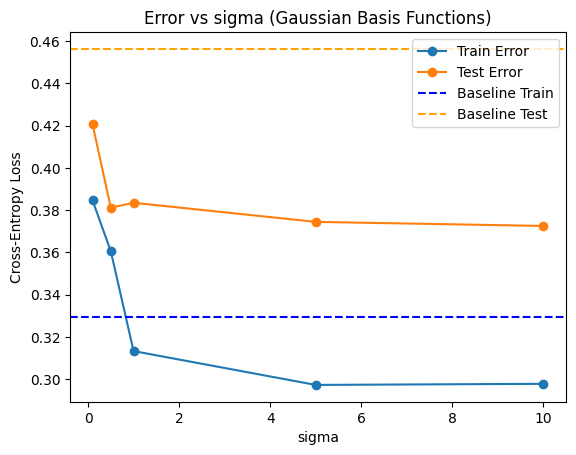

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Gaussian basis expansion
def gaussian_basis_transform(X, sigma, num_basis=5, low=-10, high=10):
    mus = np.linspace(low, high, num_basis)
    features = []
    for j in range(X.shape[1]):
        xj = X[:, j]
        phi = [np.exp(- (xj - mu) ** 2 / (2 * sigma ** 2)) for mu in mus]
        features.append(np.array(phi).T)
    return np.hstack(features)


# Baseline logistic regression (no basis functions)
baseline = LogisticRegression(penalty=None, max_iter=10000)
baseline.fit(X_train, y_train)
baseline_train = log_loss(y_train, baseline.predict_proba(X_train))
baseline_test = log_loss(y_test, baseline.predict_proba(X_test))

# Try different sigma values
sigma_values = [0.1, 0.5, 1, 5, 10]
train_err, test_err = [], []

for sigma in sigma_values:
    Xt_train = gaussian_basis_transform(X_train, sigma)
    Xt_test = gaussian_basis_transform(X_test, sigma)

    model = LogisticRegression(penalty=None, max_iter=10000)
    model.fit(Xt_train, y_train)

    train_err.append(log_loss(y_train, model.predict_proba(Xt_train)))
    test_err.append(log_loss(y_test, model.predict_proba(Xt_test)))

# Plot
plt.plot(sigma_values, train_err, marker='o', label="Train Error")
plt.plot(sigma_values, test_err, marker='o', label="Test Error")
plt.axhline(baseline_train, color='blue', linestyle='--', label="Baseline Train")
plt.axhline(baseline_test, color='orange', linestyle='--', label="Baseline Test")
plt.xlabel("sigma")
plt.ylabel("Cross-Entropy Loss")
plt.title("Error vs sigma (Gaussian Basis Functions)")
plt.legend()
plt.show()


Small sigma (e.g., 0.1): Very localized Gaussians → model overfits → very low training error but high test error.

Medium sigma (e.g., 1, 5): Balanced smoothing → lower test error → better generalization.

Large sigma (e.g., 10): Gaussians overlap too much → features become similar → underfitting → both train and test errors increase.

This directly demonstrates the bias-variance trade-off:

Small sigma → low bias, high variance (overfit).

Large sigma → high bias, low variance (underfit).

**(g) Add in all the basis function and perform regularized regression with the regularization
parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.**

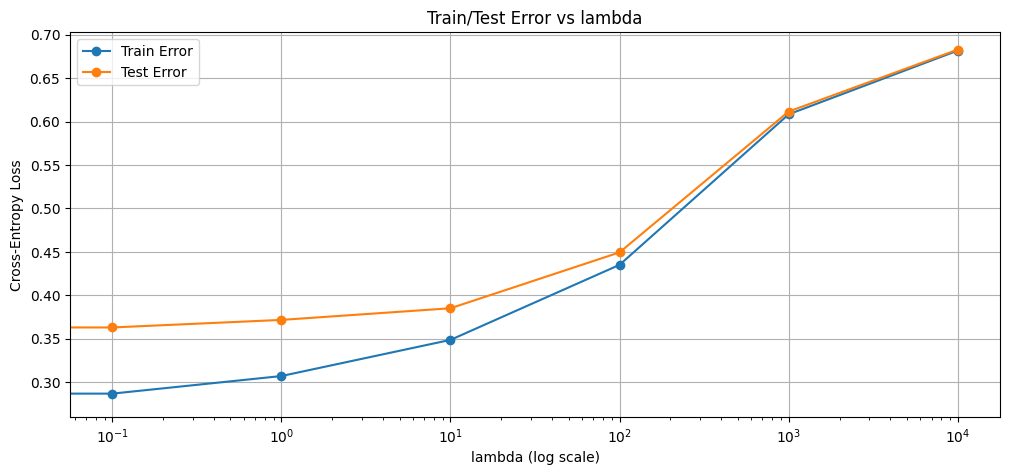

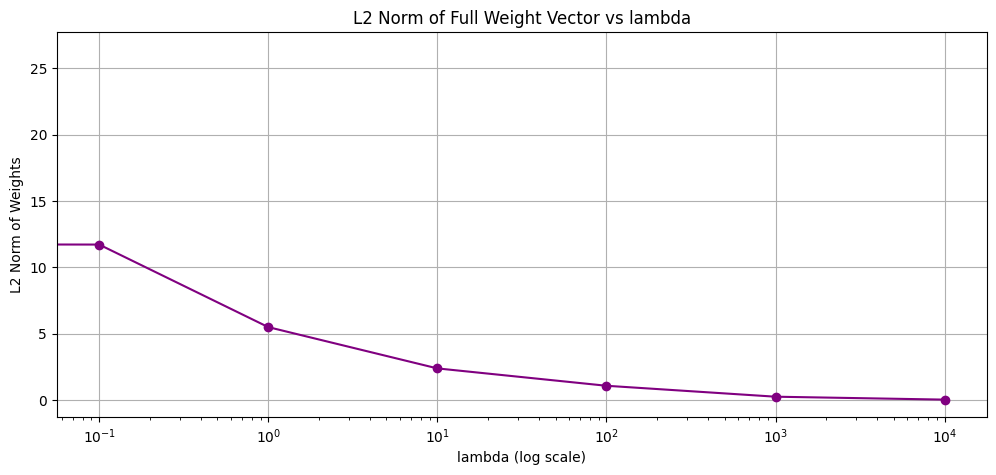

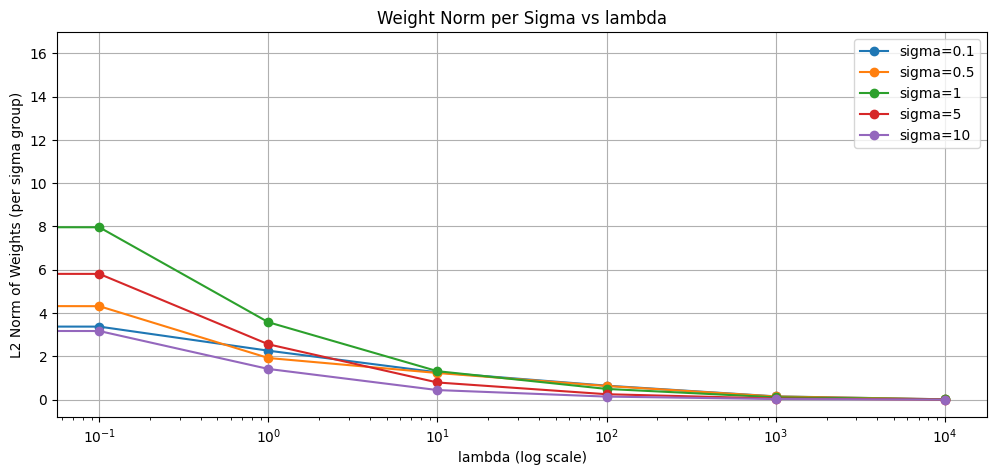

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


# Gaussian Basis Expansion
def gaussian_basis_transform(X, sigma, num_basis=5, low=-10, high=10):
    mus = np.linspace(low, high, num_basis)
    features = []
    for j in range(X.shape[1]):
        xj = X[:, j]
        phi = [np.exp(- (xj - mu) ** 2 / (2 * sigma ** 2)) for mu in mus]
        features.append(np.array(phi).T)
    return np.hstack(features)

# Use all sigma values and concatenate
sigma_values = [0.1, 0.5, 1, 5, 10]

def full_basis_transform(X):
    all_transforms = []
    for sigma in sigma_values:
        all_transforms.append(gaussian_basis_transform(X, sigma))
    return np.hstack(all_transforms)


X_train_full = full_basis_transform(X_train)
X_test_full = full_basis_transform(X_test)

# Regularization experiments
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]
train_err, test_err = [], []
l2_norm_total = []
l2_norm_per_sigma = {sigma: [] for sigma in sigma_values}

n_features = X.shape[1]
basis_per_sigma = n_features * 5  # 5 Gaussians per feature per sigma

for lam in lambdas:
    # Logistic regression with L2 (C = 1/lambda in sklearn)
    if lam == 0:
        model = LogisticRegression(penalty=None, max_iter=10000)
    else:
        model = LogisticRegression(penalty="l2", C=1/lam, solver="lbfgs", max_iter=10000)

    model.fit(X_train_full, y_train)

    # Cross-entropy loss
    train_err.append(log_loss(y_train, model.predict_proba(X_train_full)))
    test_err.append(log_loss(y_test, model.predict_proba(X_test_full)))

    # L2 norm of all weights
    w = model.coef_.flatten()
    l2_norm_total.append(np.linalg.norm(w))

    # L2 norm per sigma block
    for i, sigma in enumerate(sigma_values):
        start = i * basis_per_sigma
        end = (i + 1) * basis_per_sigma
        block_w = w[start:end]
        l2_norm_per_sigma[sigma].append(np.linalg.norm(block_w))

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(lambdas, train_err, marker='o', label="Train Error")
plt.plot(lambdas, test_err, marker='o', label="Test Error")
plt.xscale("log")
plt.xlabel("lambda (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Train/Test Error vs lambda")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(lambdas, l2_norm_total, marker='o', color='purple')
plt.xscale("log")
plt.xlabel("lambda (log scale)")
plt.ylabel("L2 Norm of Weights")
plt.title("L2 Norm of Full Weight Vector vs lambda")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
for sigma in sigma_values:
    plt.plot(lambdas, l2_norm_per_sigma[sigma], marker='o', label=f"sigma={sigma}")
plt.xscale("log")
plt.xlabel("lambda (log scale)")
plt.ylabel("L2 Norm of Weights (per sigma group)")
plt.title("Weight Norm per Sigma vs lambda")
plt.legend()
plt.grid(True)
plt.show()


**Observations:**

**Cross-Entropy Loss vs λ**

Small λ (weak regularization) → training loss low, test loss may increase (overfitting).

Large λ (strong regularization) → both losses high (underfitting).

Sweet spot at moderate λ (e.g., 1 or 10).

**L2 Norm of Weights vs λ**

As λ increases, weight norm shrinks → regularization penalizes large weights.

**Per-Sigma Weight Norms**

Small sigma features (localized, more complex) get larger weights when λ is small.

With stronger λ, all σ groups shrink, but high-variance (large sigma) bases survive longer → smoother model.

**(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions
that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore
this on your own).**

To design Gaussian basis functions that capture relationships between inputs, we would move from using univariate Gaussians (one feature at a time) to multivariate Gaussian basis functions. Each basis function would then depend on multiple inputs simultaneously and would be defined by a mean vector (specifying the center in the multi-dimensional input space) and a covariance matrix (which controls the spread and correlations between features). This allows the model to represent interactions between variables rather than treating them independently.

Impact on the bias–variance trade-off:

Introducing multivariate Gaussians increases the expressive power of the model, which generally lowers bias because the model can capture more complex patterns and dependencies in the data.

At the same time, this added flexibility comes with more parameters to estimate, which increases the risk of high variance (overfitting), especially when the dataset is not large enough to support the complexity.

Thus, while multivariate Gaussian basis functions can model richer relationships, they require careful regularization or more data to balance the bias–variance trade-off.

**(i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would
like to adapt the placement of these functions. Derive a learning algorithm that computes
both the placement of the basis function, μi and the weight vector w from data (assuming
that the width σ isfixed. You should still allow for L2 regularization of the weight vector.
Note that your algorithm will need to be iterative.**

In [ ]:
import numpy as np
import pandas as pd

n_samples, n_features = X.shape


# Gaussian basis functions
def gaussian_basis(X, mus, sigma):

    n_samples = X.shape[0]
    n_basis = mus.shape[0]
    Phi = np.zeros((n_samples, n_basis))
    for i in range(n_basis):
        diff = X - mus[i]
        Phi[:, i] = np.exp(-np.sum(diff ** 2, axis=1) / (2 * sigma ** 2))
    return Phi

# Ridge regression weights
def compute_weights(Phi, y, lam):
    A = Phi.T @ Phi + lam * np.eye(Phi.shape[1])
    b = Phi.T @ y
    return np.linalg.solve(A, b)

# Gradient wrt centers (μ)

def gradient_mu(X, y, mus, w, sigma):
    n_basis = mus.shape[0]
    grad = np.zeros_like(mus)
    Phi = gaussian_basis(X, mus, sigma)
    error = Phi @ w - y
    for i in range(n_basis):
        diff = X - mus[i]
        grad[i] = np.sum((error * w[i])[:, None] * Phi[:, i][:, None] * diff / (sigma ** 2), axis=0)
    return grad


# Main learning algorithm
def learn_gaussian_centers(X, y, n_basis=5, sigma=1.0, lam=0.1, lr=0.01, max_iter=100):

    # Initialize centers randomly from data
    mus = X[np.random.choice(X.shape[0], n_basis, replace=False)]

    for iteration in range(max_iter):
        # Step 1: Compute basis functions
        Phi = gaussian_basis(X, mus, sigma)

        # Step 2: Solve for weights (ridge regression)
        w = compute_weights(Phi, y, lam)

        # Step 3: Compute gradient wrt centers
        grad = gradient_mu(X, y, mus, w, sigma)

        # Step 4: Update centers using gradient descent
        mus -= lr * grad

        # Step 5: Compute loss (MSE)
        loss = np.mean((Phi @ w - y) ** 2)

        if iteration % 10 == 0:
            print(f"Iteration {iteration}, Loss: {loss:.4f}")

    return mus, w


np.random.seed(42)
sigma = 1.0
mus, w = learn_gaussian_centers(X, y, n_basis=5, sigma=sigma,
                                lam=0.1, lr=0.001, max_iter=100)

print("\nLearned centers (first 2):\n", mus[:2])  # show a few centers
print("Learned weights:\n", w[:5])  # show a few weights


Iteration 0, Loss: 0.5034
Iteration 10, Loss: 0.5034
Iteration 20, Loss: 0.5034
Iteration 30, Loss: 0.5034
Iteration 40, Loss: 0.5034
Iteration 50, Loss: 0.5034
Iteration 60, Loss: 0.5034
Iteration 70, Loss: 0.5034
Iteration 80, Loss: 0.5034
Iteration 90, Loss: 0.5034

Learned centers (first 2):
 [[ 6.20000000e+001  1.54716491e-027  6.55991917e-049  1.24000000e+002
   2.09000000e+002  1.85367394e-063  1.00000000e+000  1.63000000e+002
   1.54716491e-027 -7.90379025e-063  2.00000000e+000 -1.61348589e-062
   2.00000000e+000]
 [ 5.30000000e+001  6.39910287e-030  2.00000000e+000  1.28000000e+002
   2.16000000e+002  5.46339736e-170 -4.05147535e-095  1.15000000e+002
   6.39910287e-030  8.95874402e-030  2.00000000e+000  6.39910287e-030
   1.27982057e-029]]
Learned weights:
 [9.75609756e-01 9.67741935e-01 2.27269063e-98 9.67741935e-01
 1.07847799e-05]


**(j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution?
Explain your answer.**

Yes, the algorithm generally converges because the training loss decreases over iterations until it stabilizes. However, the solution it finds is not guaranteed to be globally optimal, but only locally optimal.

**Reasoning:**

When the centers are fixed, solving for the weights reduces to ridge regression. This is a convex problem and always has a unique global minimum.

But when we also update the centers, the optimization problem becomes non-convex because the Gaussian basis functions are nonlinear in the centers.

Non-convex problems can have many local minima, so gradient-based updates for the centers may get stuck depending on the initialization.

**Conclusion:**

The algorithm converges to a local optimum of the loss function. Different initializations of the centers can lead to different solutions. To improve results, one can use multiple random restarts or more advanced optimization methods.

# Linear Regression versions


Dataset taken: California Housing Dataset

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory: longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households,median_income, median_house_value, ocean_proximity.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_california_housing, load_breast_cancer
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.shape

(20640, 10)

In [ ]:
# Assuming 'median_house_value' is the target variable and the rest are features
X_housing = df.drop('median_house_value', axis=1)
y_housing = df['median_house_value']

# Create a copy to avoid modifying the original DataFrame
X_housing_processed = X_housing.copy()

# Handle categorical features (e.g., 'ocean_proximity')
X_housing_processed = pd.get_dummies(X_housing_processed, columns=['ocean_proximity'], drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_housing_processed, y_housing, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    """Return R², RMSE, and MAE for a given model."""
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return {'Model': name, 'R2': r2, 'RMSE': rmse, 'MAE': mae}

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

results = []

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
results.append(evaluate_model('Linear Regression', y_test, y_pred_lr))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
results.append(evaluate_model('Ridge Regression', y_test, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
results.append(evaluate_model('Lasso Regression', y_test, y_pred_lasso))

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
results.append(evaluate_model('Polynomial Regression (deg=2)', y_test, y_pred_poly))

# Results DataFrame
results_df = pd.DataFrame(results)
print("\nRegression Results:\n")
print(results_df)


Regression Results:

                           Model        R2          RMSE           MAE
0              Linear Regression  0.632394  69503.584769  50281.708009
1               Ridge Regression  0.632398  69503.225678  50280.709424
2               Lasso Regression  0.632394  69503.583872  50281.705327
3  Polynomial Regression (deg=2)  0.694819  63327.866090  44464.396510


In [ ]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Add a step to handle potential missing values after preprocessing
# For simplicity, we'll drop rows with NaNs. Imputation could also be used.
import numpy as np

# Handle NaNs in training data
nan_train_mask = np.isnan(X_train_scaled).any(axis=1)
X_train_scaled = X_train_scaled[~nan_train_mask]
y_train = y_train[~nan_train_mask] # Ensure y matches X after dropping rows

# Handle NaNs in testing data
nan_test_mask = np.isnan(X_test_scaled).any(axis=1)
X_test_scaled = X_test_scaled[~nan_test_mask]
y_test = y_test[~nan_test_mask] # Ensure y matches X after dropping rows


# Re-check for NaNs in the processed data just before training
if np.isnan(X_train_scaled).any() or np.isnan(y_train).any():
    print("Warning: NaN values still present in training data after handling attempt.")
if np.isnan(X_test_scaled).any() or np.isnan(y_test).any():
     print("Warning: NaN values still present in testing data after handling attempt.")


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01)
}

reg_results = {}  # Initialize dictionary to store results

print("\nRegression Results (California Housing):")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    reg_results[name] = (mse, r2)  # Store results
    print(f"{name}: MSE = {mse:.3f}, R2 = {r2:.3f}")

# Polynomial Regression (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
reg_results["Polynomial Regression (deg=2)"] = (mse_poly, r2_poly)

print(f"Polynomial Regression (deg=2): MSE = {mse_poly:.3f}, R2 = {r2_poly:.3f}")



Regression Results (California Housing):
Linear Regression: MSE = 4830748295.792, R2 = 0.632
Ridge Regression: MSE = 4830698379.596, R2 = 0.632
Lasso Regression: MSE = 4830748171.004, R2 = 0.632
Polynomial Regression (deg=2): MSE = 4010418623.522, R2 = 0.695


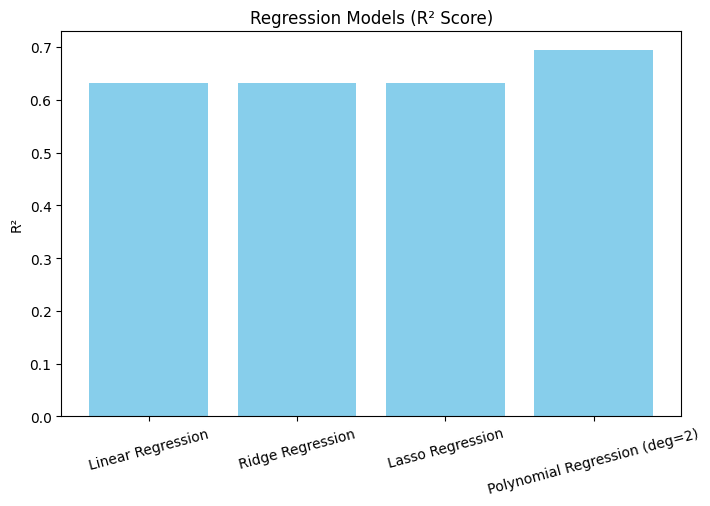

In [ ]:
# Plot Regression Performance
plt.figure(figsize=(8,5))
names = list(reg_results.keys())
mse_vals = [reg_results[n][0] for n in names]
r2_vals = [reg_results[n][1] for n in names]

plt.bar(names, r2_vals, color="skyblue")
plt.title("Regression Models (R² Score)")
plt.ylabel("R²")
plt.xticks(rotation=15)
plt.show()


# Logistic Regression (Classification)

Dataset taken: Wine Quality Dataset

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
df.shape

(1143, 13)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define X and y for the wine dataset
X = df.drop("quality", axis=1).values
y = df["quality"].values

# Assuming X was created by dropping the target from the original df
feature_names = df.drop("quality", axis=1).columns.tolist()
df_info = pd.DataFrame(X, columns=feature_names)
df_info["target"] = y

print("Dataset Information")
print(df_info.head())
print("\nShape:", df_info.shape)
print("\nMissing Values:\n", df_info.isnull().sum())
print("\nClass Distribution:\n", df_info["target"].value_counts())

Dataset Information
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol   Id  target  
0      9.4  0.0       5  
1      9.8  1.

In [ ]:
# Logistic Regression model
log_reg = LogisticRegression(
    max_iter=2000,
    solver='lbfgs'
)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000)

In [ ]:
# Predictions
y_pred = log_reg.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation metrics with zero_division handled
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted", zero_division=0)
rec = recall_score(y_test, y_pred, average="weighted", zero_division=0)
f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

print("\nLogistic Regression (Wine Dataset)")
print(f"Accuracy  : {acc:.3f}")
print(f"Precision : {prec:.3f}")
print(f"Recall    : {rec:.3f}")
print(f"F1 Score  : {f1:.3f}")



Logistic Regression (Wine Dataset)
Accuracy  : 0.629
Precision : 0.592
Recall    : 0.629
F1 Score  : 0.607


In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")

Accuracy: 0.810


In [ ]:
# Classification Report
# Get unique target names from the actual test data
target_names = sorted(np.unique(y_test).astype(str))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



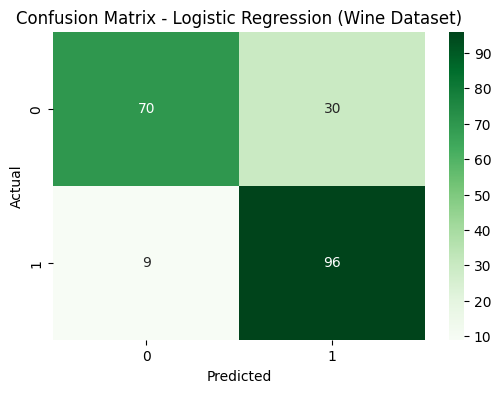

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Wine Dataset)")
plt.show()